# Project: Medical Data Visualizer
## Introduction
This project aims to find the correlation between variables such as weight, blood pressure and cholesterol with cardiovascular disease. the goal is to use a heatmap to illustrate the correlations.

### About the dataset
- dataset: cardio_train.csv

- key metric:  ap_hi, ap_lo, weight, cholesterol

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [2]:
Cardiovascular_Disease = pd.read_csv('cardio_train.csv', sep = ';')
Cardiovascular_Disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### converting the age in days to years

In [3]:
Cardiovascular_Disease['age'] = (Cardiovascular_Disease['age'] / 365.25).astype(int)

In [12]:
Cardiovascular_Disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Filtering the dataframe so that the rows with systolic blood pressure greater than its diastolic blood pressure remains

In [6]:
Filterd_df1 = Cardiovascular_Disease [Cardiovascular_Disease['ap_hi'] > Cardiovascular_Disease['ap_lo']]
Filterd_df1.shape

(68764, 13)

### Filtering the dataframe with systolic blood pressure is less then 250 and diastolic blood pressure greater than 40 remains

In [7]:
filtered_df2 = Filterd_df1[(Filterd_df1['ap_hi'] < 250) & (Filterd_df1['ap_lo'] > 40)].copy()
filtered_df2.shape

(68656, 13)

### Feature Engineering
Adding a column called BMI that contains the BMI of the individuals

In [8]:
filtered_df2['BMI'] = filtered_df2['weight'] / (filtered_df2['height'] / 100)**2
filtered_df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


### A heatmeap showing the correlation matrix of the variables is made

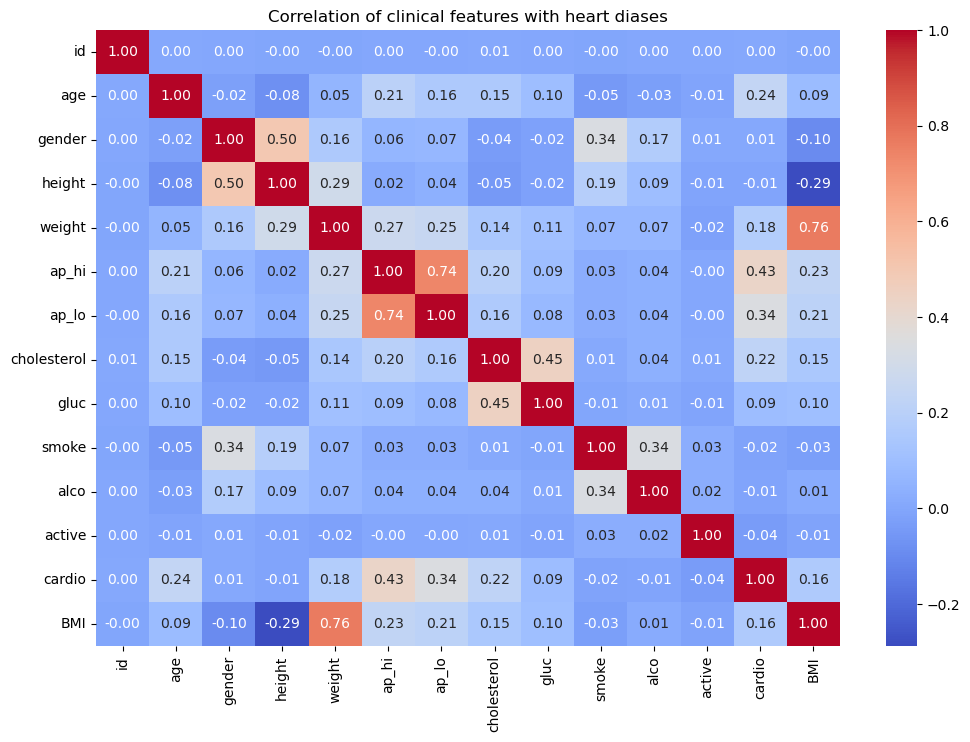

In [11]:
correlation = filtered_df2.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation of clinical features with heart diases')
plt.show()

## Summary of the Finding
The heatmap reveals that ap_hi (systolic blood pressure) is the strongest individual predictor of cardiovascular disease with a correlation cofficent of (0.43) followed by ap_lo(diastolic blood pressure) which has a correlation cofficent (0.34). both are moderatelly correlated with cardiovascular disease, meaning their increase increases the liklihood of having cardiovascular disease.
incontrast, the other variables weight and cholesterol have low correlation with cardiovascular disease with correlation cofficents of (0.18) and (0.22). While Weight shows a slightly higher correlation with heart disease (0.18) than BMI (0.16) in this dataset, BMI was engineered as a feature to provide a standardized clinical metric that accounts for height-weight proportions.